In [ ]:
# load Iris dataset and do a regular rf classification on it

In [32]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n = X.shape[0]
m = X.shape[1]

print(X_train.shape)

(120, 4)


In [30]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=True)
clf = clf.fit(X_train, y_train)
print(clf)
print([clf.score(X_train, y_train), clf.score(X_test, y_test)])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
[1.0, 1.0]


In [ ]:
# use the constructed random forest to calculate distance of two samples
# has two parts, one being the previous metrics, the other being the updated one

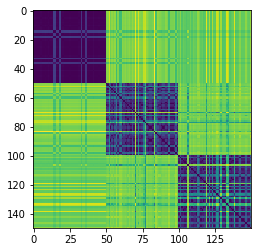

In [39]:
forest = clf.estimators_
d = np.zeros([n, n])

for k in range(100):
    
    tree = forest[k]
    
    path = tree.decision_path(X).todense()
    n_nodes = tree.tree_.node_count
    l_children = tree.tree_.children_left
    r_children = tree.tree_.children_right
    
    node_depth = np.zeros(n_nodes)
    is_leaves = np.zeros(n_nodes)
    stack = [(0, -1)]
    
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        if (l_children[node_id] != r_children[node_id]):
            stack.append((l_children[node_id], parent_depth + 1))
            stack.append((r_children[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = 1
    
    for i in range(n):
        for j in range(n):
            sample_ids = [i, j]
            splitting_depth = (path[sample_ids].sum(axis=0) == len(sample_ids)).sum()
            leaf_i = tree.apply(X[i].reshape(1, -1))
            leaf_j = tree.apply(X[j].reshape(1, -1))
            d[i, j] = d[i, j]+node_depth[leaf_i]+node_depth[leaf_j]-2*splitting_depth
            
d = d/100
plt.imshow(d)
plt.show()

In [75]:
forest = clf.estimators_
d2 = np.zeros([n, n])

for k in range(100):
    
    tree = forest[k]
    
    path = tree.decision_path(X).todense()
    n_nodes = tree.tree_.node_count
    
    for i in range(n):
        for j in range(n):
            sample_ids = [i, j]
            d2[i, j] = d2[i, j]+(path[sample_ids].sum(axis=0) == len(sample_ids)).sum()
            
d2 = d2/100
d2_actual = [1/x for x in d2]

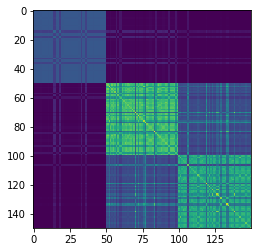

In [76]:
plt.imshow(d2)
plt.show()

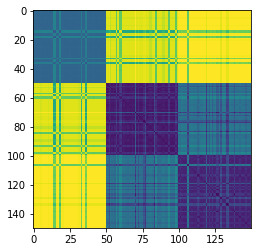

In [77]:
plt.imshow(d2_actual)
plt.show()

In [ ]:
# normalize the data to get rid of the influence of scale of individual feature

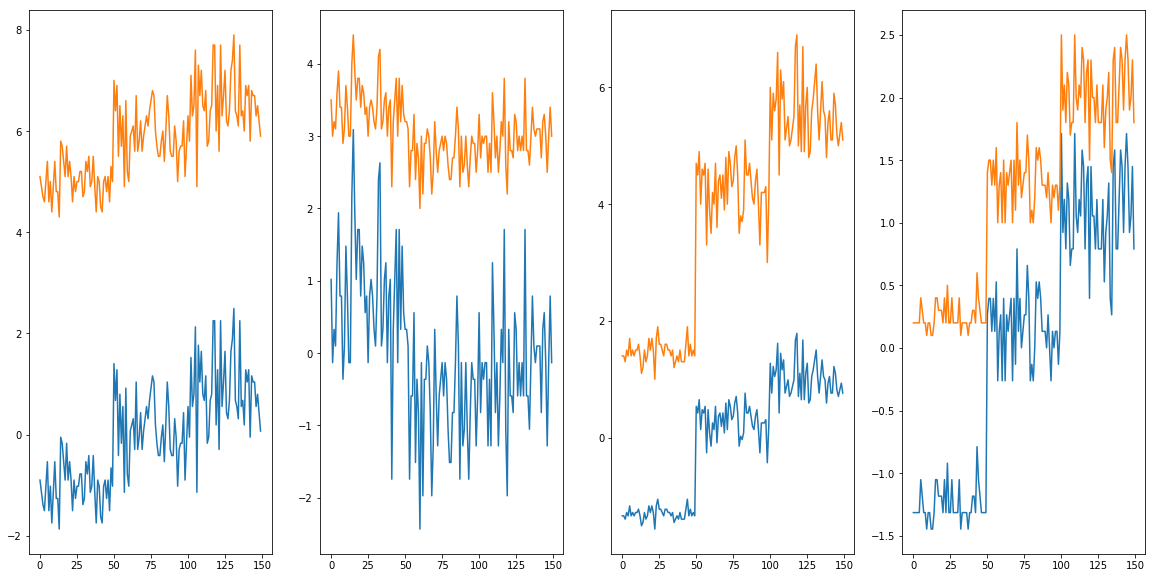

In [18]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

D = np.zeros([n, n])
X_scaled = preprocessing.scale(X)
plt.figure(figsize=(20, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.plot(X_scaled[:, i])
    plt.plot(X[:, i])

In [ ]:
# calculate the Euclidean distance for every pair of samples 

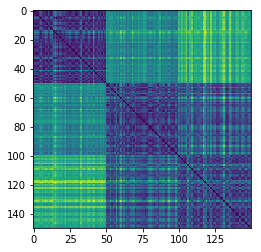

In [23]:
for i in range(n):
    for j in range(n):
        D[i, j] = np.linalg.norm(X_scaled[i, :]-X_scaled[j, :])
        
plt.imshow(D)
plt.show()

In [ ]:
# compare the distance we get from classification to the euclidean distance using MSE as a criteria

In [42]:
def MSE(X, Y):
    
    n = X.shape[0]
    mse = 0
    
    for i in range(n):
        for j in range(n):
            mse = mse + (X[i, j]-Y[i, j])**2
    
    return mse/(n**2)

0.6050462645680612
0.2891874584162053
2.623221767568958


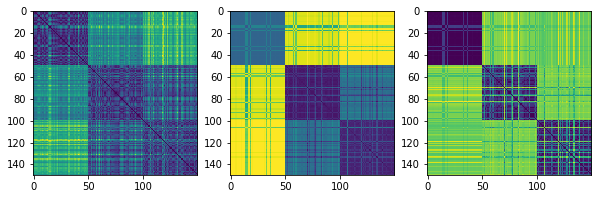

In [83]:
d_scaled = preprocessing.scale(d)
d2_scaled = preprocessing.scale(d2_actual)
d3 = np.zeros([n, n])
D_scaled = preprocessing.scale(D)

for i in range(n):
    for j in range(n):
        d3[i, j] = (d_scaled[i, j]**2 + d2_scaled[i, j]**2)**0.5

d3_scaled = preprocessing.scale(d3)

print(MSE(D_scaled, d_scaled))
print(MSE(D_scaled, d2_scaled))
print(MSE(D_scaled, d3_scaled))

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(D)
plt.subplot(1, 3, 2)
plt.imshow(d2_actual)
plt.subplot(1, 3, 3)
plt.imshow(d)
